In [2]:
import os
import dvu
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from functools import reduce

import viz

# plt.style.use('default')
dvu.set_style()
df = pd.read_pickle('../data/cdis_with_schemas_cleaned.pkl')

In [3]:
METADATA_DICT = {
    "disease_en": "addressing this disease",
    "system_en": "addressing this system",
    "purpose_en": "with this purpose",
    "chief_complaint_en": "addressing this chief complaint",
    "specialty_en": "with this specialty",
}
val_counts_dict = {}

for col in METADATA_DICT:
    all_vals = sum(df[col], [])
    all_vals = [x for x in all_vals if x and not x == "Any/All"]  # remove empty strings
    val_counts = pd.Series(all_vals).value_counts()

    # print
    val_counts = val_counts.reset_index().rename(columns={'index': col})
    val_counts_dict[col] = val_counts


    # make plot
    # if col == "purpose_en":
    #     plt.figure(figsize=(4, 4), dpi=300, facecolor="w")
    # else:
    #     plt.figure(figsize=(10, 12), dpi=300, facecolor="w")
    # N = 60
    # ax = sns.barplot(y=val_counts.index[:N], x=val_counts.values[:N], orient="h")
    # ax.bar_label(ax.containers[0])
    # plt.xlabel(f"Number of CDIs {METADATA_DICT[col]}\n(Out of {df.shape[0]} CDIs)")
    # plt.tight_layout()
    # viz.savefig(col)
    # # plt.close()

In [4]:
vals = [val_counts_dict[k] for k in val_counts_dict]
n = 15
d = pd.concat([vals[i].iloc[:n] for i in range(len(vals))], axis=1)
# turn columns into multiindex
d = d.fillna('')
titles = [k.replace('_en', '').replace('_', ' ').capitalize() for k in METADATA_DICT]
d.columns = pd.MultiIndex.from_product([titles, ['', '']])
display(d.style.format(precision=0).hide(axis='index'))

In [5]:
# for col in METADATA_DICT.keys():
#     all_vals = sum(df[col], [])
#     all_vals = [x for x in all_vals
#                 if x  # remove empty strings
#                 and not x == 'Any/All'
#                 ]
#     os.makedirs('../data/renaming', exist_ok=True)
#     print(f'../data/renaming/{col}.csv')
#     np.savetxt(f'../data/renaming/{col}.csv',
#                np.unique(all_vals), delimiter=',', fmt='%s')

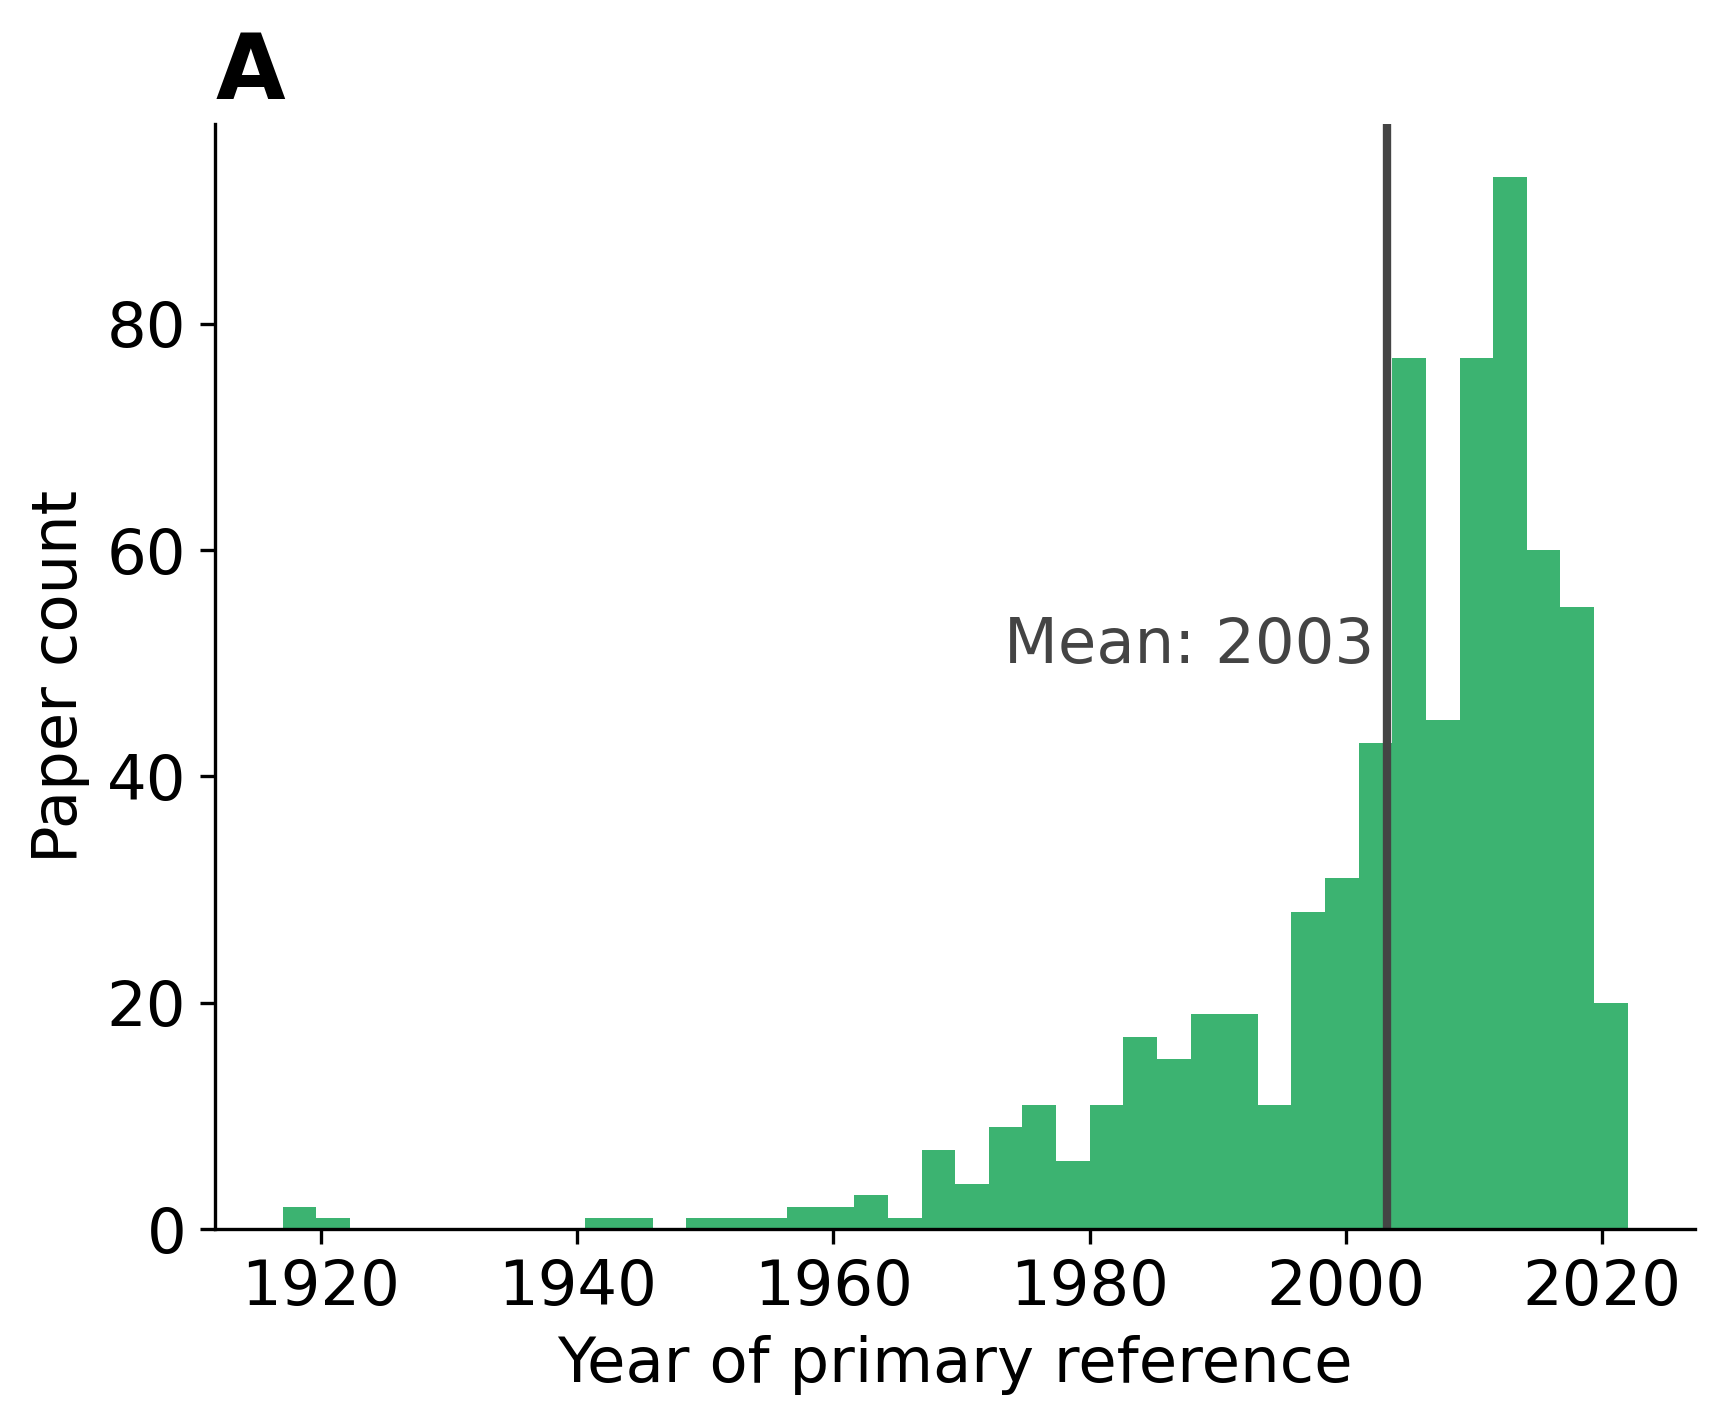

In [22]:
plt.figure(dpi=300, figsize=(6, 5))
plt.hist(df['ref_year'], bins=40, color='mediumseagreen')
avg = np.mean(df['ref_year'])
plt.axvline(x=avg, ls='-', color='#444', lw=2)
# alight text to the left of the line
plt.text(s=f'Mean: {avg:0.0f}', x=avg - 1, y=50, color='#444', ha='right')
plt.xlabel('Year of primary reference')
plt.ylabel('Paper count')
plt.title('A', loc='left', fontsize='x-large', fontweight='bold')
plt.tight_layout()
viz.savefig('ref_year')
plt.show()